<a href="https://colab.research.google.com/github/KuzmenkoO/amazinum_home_work/blob/main/lesson_25_tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1, 1080)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (1, 120)


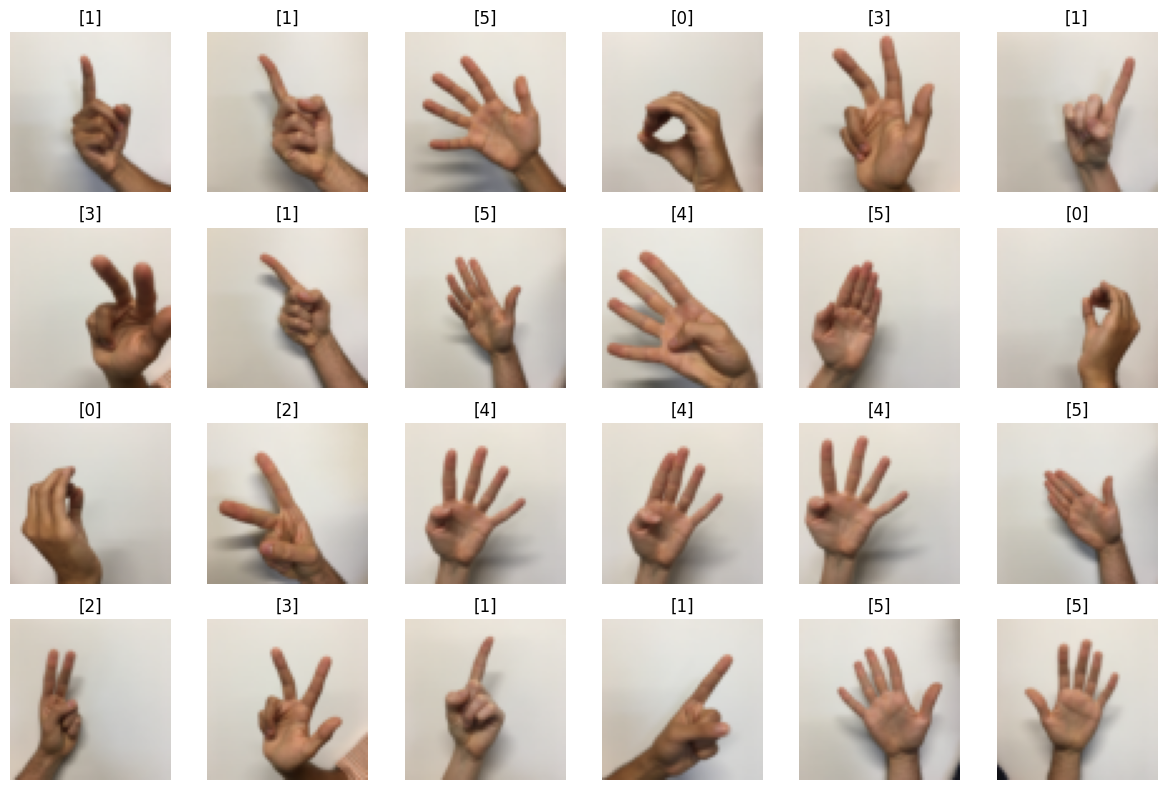

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])

    test_dataset =  h5py.File('test_signs.h5', "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    return X_train, Y_train, X_test, Y_test, classes

def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')


X_train, Y_train, X_test, Y_test, classes = load_dataset()

print ('train_data.shape=', X_train.shape)
print ('train_labels.shape=',  Y_train.shape)
print ('test_data.shape=', X_test.shape)
print ('test_labels.shape=', Y_test.shape)

plt.figure(figsize= (12,8))
display_samples_in_grid(X_train, n_rows=4, n_cols=6, y= Y_train.T)
plt.tight_layout(h_pad=1, w_pad=1)

Y_train_cat = to_categorical(Y_train.squeeze())
Y_test_cat = to_categorical(Y_test.squeeze())

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.


def build_model(hidden_layers=2, activation='tanh', dropout_rate=0.3):
    model = Sequential()
    model.add(Flatten(input_shape=(64, 64, 3)))

    for units in [512, 256, 128][:hidden_layers]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(hidden_layers, activation, dropout_rate):
    model = build_model(hidden_layers, activation, dropout_rate)
    print(f"\n Training Model | Layers={hidden_layers}, Activation={activation}, Dropout={dropout_rate}")
    history = model.fit(X_train, Y_train_cat, epochs=20, batch_size=64,
                        validation_data=(X_test, Y_test_cat),
                        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
                        verbose=1)

    loss, acc = model.evaluate(X_test, Y_test_cat, verbose=0)
    print(f" Test Accuracy: {acc:.4f}, Loss: {loss:.4f}")

    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



 Training Model | Layers=10, Activation=tanh, Dropout=0.5
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.1632 - loss: 2.4461 - val_accuracy: 0.1667 - val_loss: 2.0174
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.1669 - loss: 2.3463 - val_accuracy: 0.1667 - val_loss: 1.8345
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.1569 - loss: 2.2894 - val_accuracy: 0.1667 - val_loss: 1.8414
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.2014 - loss: 2.2124 - val_accuracy: 0.1667 - val_loss: 1.8511
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.1677 - loss: 2.3023 - val_accuracy: 0.1667 - val_loss: 1.8036
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.1521 - loss: 2.2679 - val_accuracy: 0.1667 - val_loss: 1.8577
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.1496 - loss: 2.1962 - val_accuracy: 0.1667 - val_loss: 1.8324
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/st

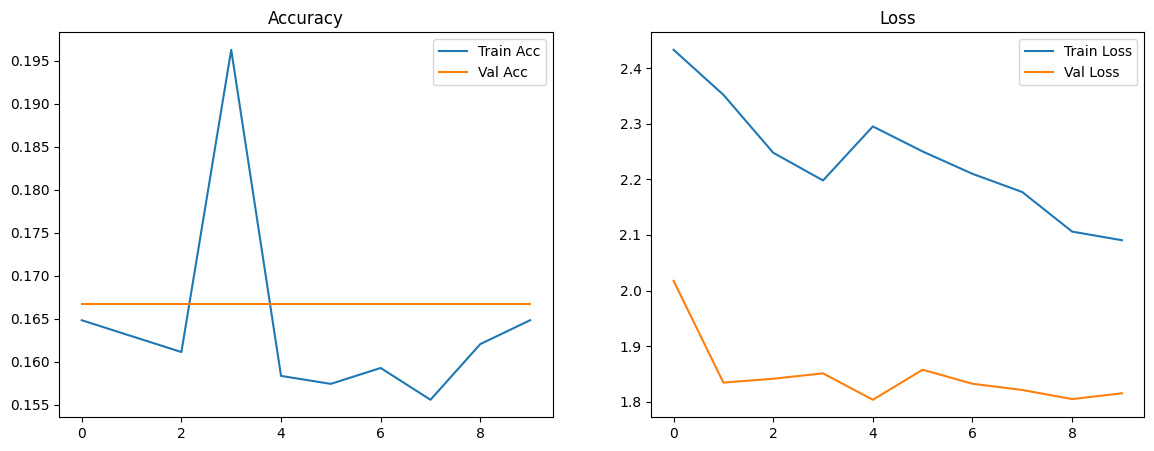


 Training Model | Layers=5, Activation=tanh, Dropout=0.1
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.1719 - loss: 2.3380 - val_accuracy: 0.1667 - val_loss: 1.8950
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.1573 - loss: 1.9032 - val_accuracy: 0.1667 - val_loss: 1.7948
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.1642 - loss: 1.9005 - val_accuracy: 0.1667 - val_loss: 1.7984
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.1674 - loss: 1.8888 - val_accuracy: 0.1667 - val_loss: 1.8208
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.1682 - loss: 1.8955 - val_accuracy: 0.1667 - val_loss: 1.8185
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.1467 - loss: 1.9151 - val_accuracy: 0.1667 - val_loss: 1.8169
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.1490 - loss: 1.9125 - val_accuracy: 0.1667 - val_loss: 1.7969
 Test Accuracy: 0.1667, Loss: 1.7948


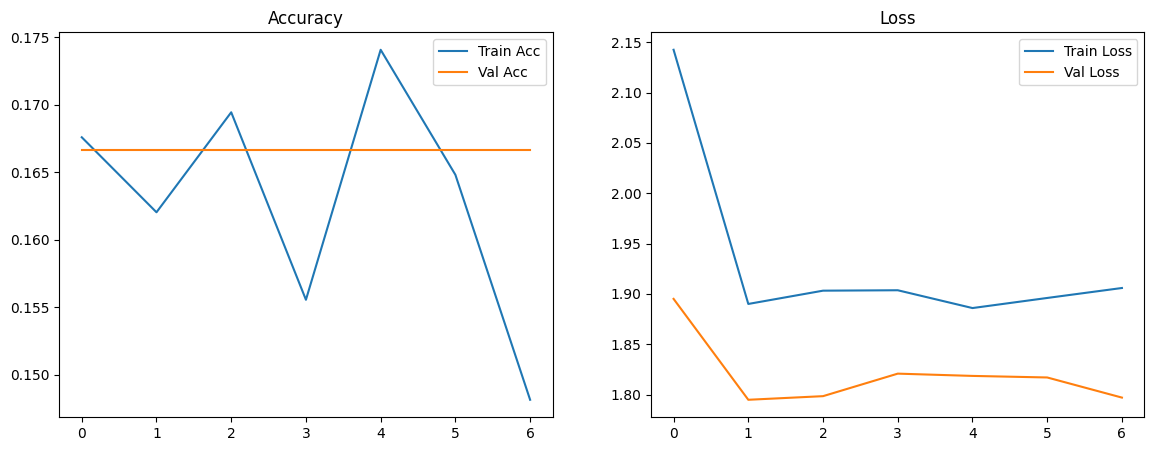


 Training Model | Layers=5, Activation=sigmoid, Dropout=0.3
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.1580 - loss: 1.9402 - val_accuracy: 0.2250 - val_loss: 1.8020
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.1782 - loss: 1.8524 - val_accuracy: 0.1667 - val_loss: 1.7999
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.1707 - loss: 1.8734 - val_accuracy: 0.1667 - val_loss: 1.7943
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.1840 - loss: 1.8202 - val_accuracy: 0.1667 - val_loss: 1.7914
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.1705 - loss: 1.8303 - val_accuracy: 0.1667 - val_loss: 1.7920
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.1729 - loss: 1.8244 - val_accuracy: 0.1667 - val_loss: 1.7912
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.1753 - loss: 1.8180 - val_accuracy: 0.1667 - val_loss: 1.7908
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 96m

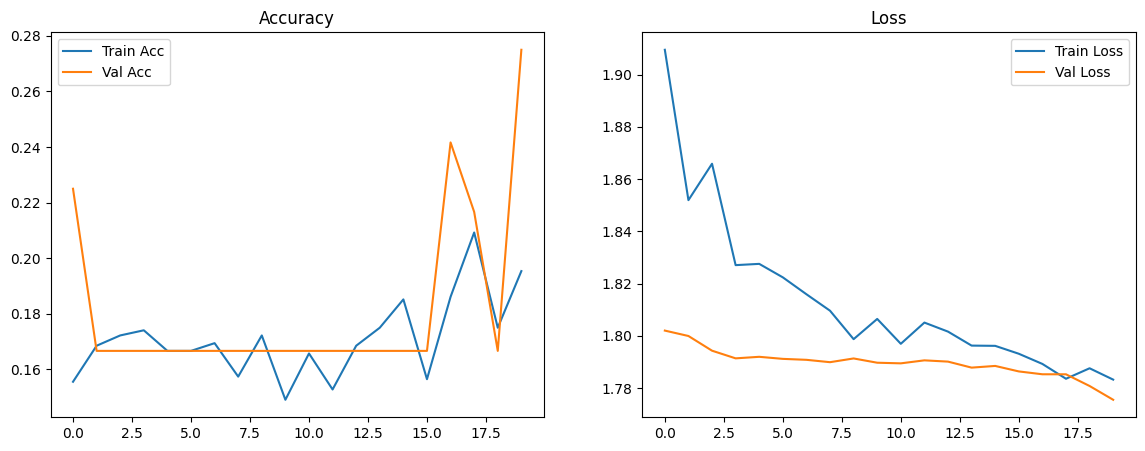


 Training Model | Layers=2, Activation=tanh, Dropout=0.1
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.1512 - loss: 3.4340 - val_accuracy: 0.1667 - val_loss: 1.8716
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.1457 - loss: 2.0055 - val_accuracy: 0.1667 - val_loss: 1.8251
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.1782 - loss: 1.8811 - val_accuracy: 0.1667 - val_loss: 1.8016
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.1418 - loss: 1.8932 - val_accuracy: 0.1667 - val_loss: 1.8062
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.1641 - loss: 1.8876 - val_accuracy: 0.1667 - val_loss: 1.7959
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.1657 - loss: 1.8728 - val_accuracy: 0.1667 - val_loss: 1.8103
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.1664 - loss: 1.8840 - val_accuracy: 0.1667 - val_loss: 1.8270
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/s

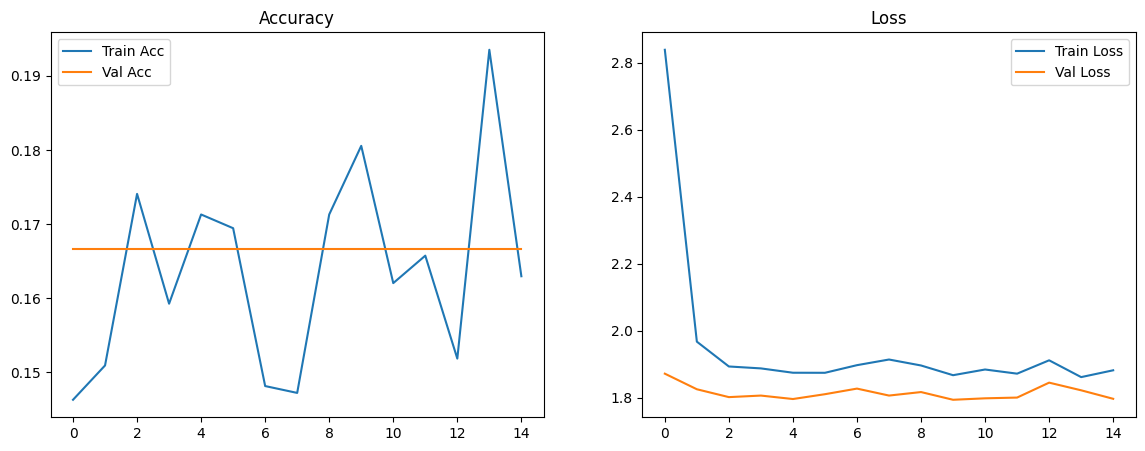


 Training Model | Layers=5, Activation=tanh, Dropout=0.1
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.1653 - loss: 2.4393 - val_accuracy: 0.1667 - val_loss: 1.8614
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.1776 - loss: 1.8840 - val_accuracy: 0.1667 - val_loss: 1.7963
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.1842 - loss: 1.8793 - val_accuracy: 0.1667 - val_loss: 1.8119
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.1593 - loss: 1.8799 - val_accuracy: 0.1667 - val_loss: 1.8016
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.1679 - loss: 1.8500 - val_accuracy: 0.1667 - val_loss: 1.8007
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.1923 - loss: 1.8498 - val_accuracy: 0.1667 - val_loss: 1.8008
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.1625 - loss: 1.8400 - val_accuracy: 0.1667 - val_loss: 1.8136
 Test Accuracy: 0.1667, Loss: 1.7963


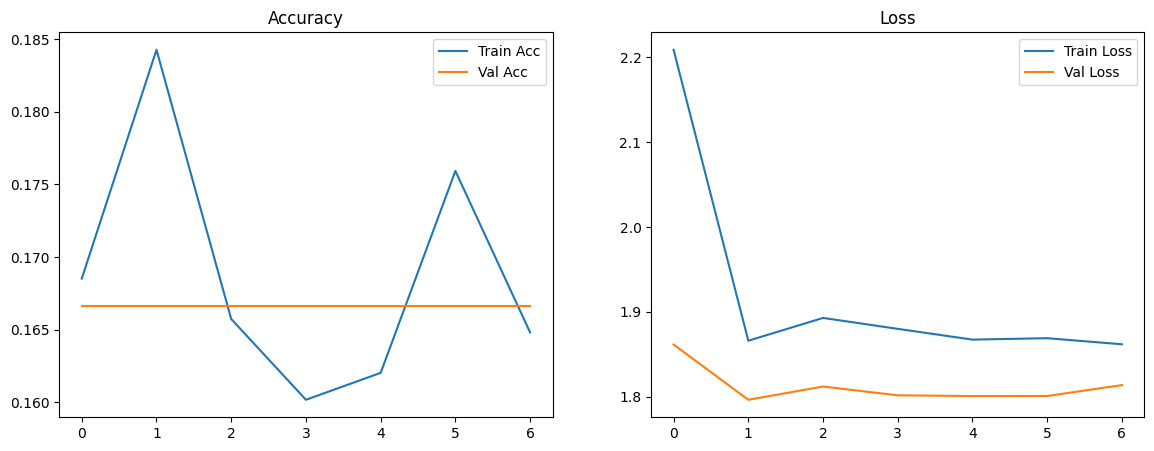


 Training Model | Layers=10, Activation=relu, Dropout=0.1
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.1641 - loss: 6.6150 - val_accuracy: 0.1667 - val_loss: 1.9474
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.1909 - loss: 2.1280 - val_accuracy: 0.2083 - val_loss: 1.7956
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.1857 - loss: 1.8537 - val_accuracy: 0.1667 - val_loss: 1.7934
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.2217 - loss: 1.7618 - val_accuracy: 0.2667 - val_loss: 1.7178
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.2293 - loss: 1.7629 - val_accuracy: 0.1917 - val_loss: 1.7284
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.2436 - loss: 1.7545 - val_accuracy: 0.3833 - val_loss: 1.6444
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.2930 - loss: 1.6586 - val_accuracy: 0.3750 - val_loss: 1.5439
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/

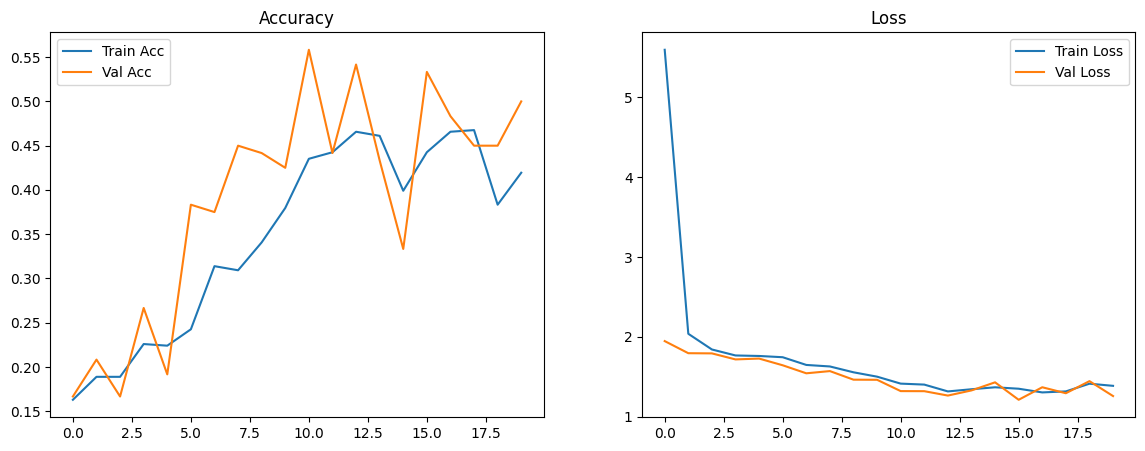


 Training Model | Layers=5, Activation=relu, Dropout=0.3
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.1845 - loss: 7.4436 - val_accuracy: 0.1667 - val_loss: 2.0393
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.1611 - loss: 2.5206 - val_accuracy: 0.2333 - val_loss: 1.7845
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.1551 - loss: 1.8134 - val_accuracy: 0.1667 - val_loss: 1.7911
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.1730 - loss: 1.7926 - val_accuracy: 0.2917 - val_loss: 1.7784
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.2306 - loss: 1.7677 - val_accuracy: 0.2000 - val_loss: 1.7419
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.2201 - loss: 1.7552 - val_accuracy: 0.2833 - val_loss: 1.7432
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.2161 - loss: 1.7371 - val_accuracy: 0.1667 - val_loss: 1.7932
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms

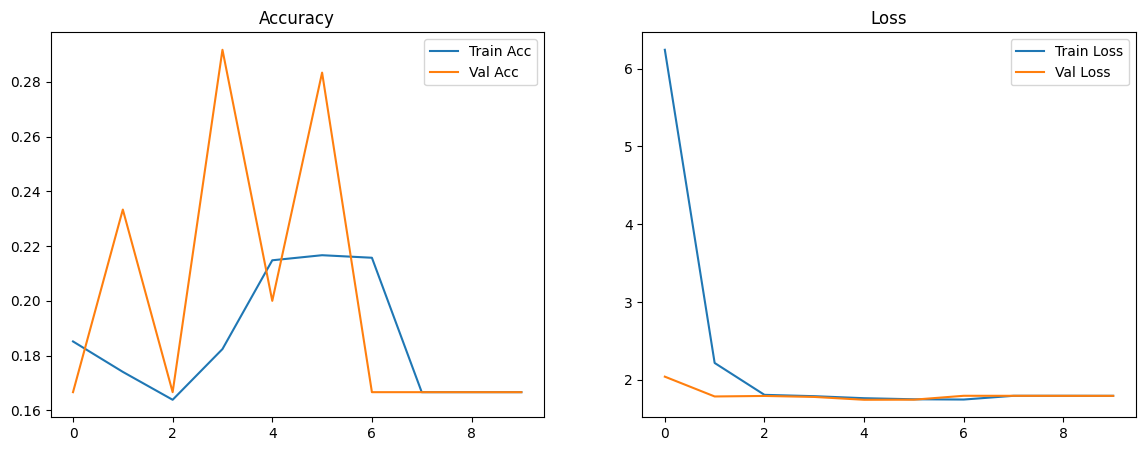


 Training Model | Layers=5, Activation=relu, Dropout=0.1
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.1593 - loss: 7.5338 - val_accuracy: 0.1667 - val_loss: 1.8942
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.1621 - loss: 2.6062 - val_accuracy: 0.1667 - val_loss: 1.7768
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.1820 - loss: 1.8966 - val_accuracy: 0.2917 - val_loss: 1.7741
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.1949 - loss: 1.8055 - val_accuracy: 0.3000 - val_loss: 1.7356
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2006 - loss: 1.7904 - val_accuracy: 0.1667 - val_loss: 1.7565
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.2070 - loss: 1.7700 - val_accuracy: 0.2500 - val_loss: 1.7369
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.2849 - loss: 1.7379 - val_accuracy: 0.3167 - val_loss: 1.6846
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/s

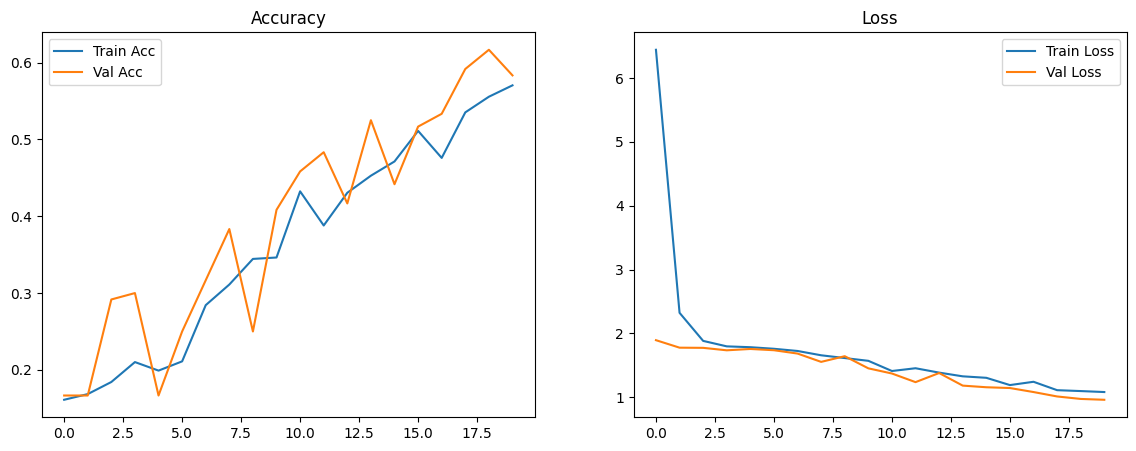

In [2]:
train_and_evaluate(hidden_layers=10, activation='tanh', dropout_rate=0.5)

train_and_evaluate(hidden_layers=5, activation='tanh', dropout_rate=0.1)

train_and_evaluate(hidden_layers=5, activation='sigmoid', dropout_rate=0.3)

train_and_evaluate(hidden_layers=2, activation='tanh', dropout_rate=0.1)

train_and_evaluate(hidden_layers=5, activation='tanh', dropout_rate=0.1)

train_and_evaluate(hidden_layers=10, activation='relu', dropout_rate=0.1)

train_and_evaluate(hidden_layers=5, activation='relu', dropout_rate=0.3)

train_and_evaluate(hidden_layers=5, activation='relu', dropout_rate=0.1)


ВИСНОВКИ:

2 шари, tanh, Dropout 0.3 val_accuracy: 16.67% val_loss: 1.7962 Модель не навчилася — слабка активація і мала глибина.

2 шари, tanh, Dropout 0.1 val_accuracy: 16.67% val_loss: 1.7937 -  навчання відсутнє.

5 шарів, tanh, Dropout 0.1 val_accuracy: 16.67% val_loss: 1.7963 -  навчання відсутнє.

10 шарів, tanh, Dropout 0.5 val_accuracy: 16.67% val_loss: 1.8036 -  навчання відсутнє.

5 шарів, sigmoid, Dropout 0.3 val_accuracy: 27.50% val_loss: 1.7755 - навчання все ще слабке.

2 шари, relu, Dropout 0.5 val_accuracy: 16.67% val_loss: 1.7917 ReLU -  навчання відсутнє.

5 шарів, relu, Dropout 0.3 val_accuracy: 20.00% val_loss: 1.7419 Незначне покращення.

10 шарів, relu, Dropout 0.1 val_accuracy: 53.33% val_loss: 1.2122 Модель демонструє ефективне навчання — глибина + ReLU + слабкий Dropout спрацювали.

5 шарів, relu, Dropout 0.1 val_accuracy: 58.33% val_loss: 0.9611  Найкраща модель! Потужне навчання, стабільне зниження втрати

Отже найкраще себе проявляє збільшення кількості шарів та зниження Dropout, активація - relu